In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk
import yfinance as yf
import seaborn as sns
from datetime import date
from pandas_datareader import data
import work as work
import investpy

import plotly.express as px
import plotly.graph_objects as go
import plotly

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.display import display, HTML


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#data = work.updated_world_indices(category = 'All', timeframe='Weekly')
#hmap = data[0]
#rawdata = data[1]
#rawdata.to_excel('rawdata.xlsx', sheet_name='Equities')

# Weekly Global Market Report


<div style="font-size: 15px">
<br>
    <b> Date: </b>  24<sup>th</sup> October, 2020
</div>

<a id ="content"></a>
## Contents:

1. [World Equities](#eq)
2. [Fixed Income](#fi)
3. [Currencies (FX)](#cur)
4. [Commodities](#comd)
5. [Charts of the Week](#charts)
6. [Key Economic Events - Next Week](#eco)

# World Equity Markets Heatmap

In [4]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def world_map(timeperiod):
    """
    """
    iso = pd.read_excel('World_Indices_List.xlsx', sheet_name='iso')
    iso.set_index('Country', inplace=True)
    rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
    rawdata = rawdata.drop(['China A50', 'SmallCap 2000', 'BSE Sensex', 'Euro Stoxx 50', 'Nasdaq 100', 'KOSDAQ', 'RTSI', 'DJ Shanghai', 'SZSE Component'], axis=0)
    data2 = rawdata.merge(iso['iso_alpha'], on='Country')
    data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']] = data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']].round(4)*100

    df = data2
    for col in df.columns:
        df[col] = df[col].astype(str)

    df['text'] = 'Return: '+df[timeperiod]+'%' + '<br>' \
                  'Country: '+ df['Country'] + '<br>' \

    fig1 = go.Figure(data=go.Choropleth(locations=df['iso_alpha'], z=df[timeperiod].astype(float).round(2), colorscale='RdYlGn', autocolorscale=False,
        text=df['text'], colorbar_ticksuffix = '%', colorbar_title = "Return"))



    return fig1.update_layout(width=950, height=500, margin=dict(l=0,r=0,b=0,t=0,pad=1),
                        xaxis=dict(scaleanchor='x', constrain='domain'), coloraxis_colorbar_x=1)

style = {'description_width': 'initial'}
interact(world_map,
             timeperiod = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Return Category: '));

interactive(children=(Dropdown(description='Return Category: ', index=2, options=(('Weekly LCL Returns', 'Chg …

<a id ="eq"></a>
## World Equities

### Local Currency & USD Performance (Weekly & YTD)
*Data is sorted by Weekly USD Performance (%)

In [5]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def hmap(sortby):
    hmap = rawdata.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}",'Chg': "{:.2f}", 'Chg (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}", '$ Chg (%)': "{:.2%}", '$ Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)', 'Chg', 'Country'], axis=1).columns))
    return hmap
    
style = {'description_width': 'initial'}
interact(hmap,
             sortby = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', index=2, options=(('Weekly LCL Returns', 'Chg (%)'), (…

In [6]:
def perf(tf):
    rawdata1 = rawdata.sort_values(by=tf, ascending=False)
    weekly_usd = rawdata1
    weekly_usd = ((pd.DataFrame(weekly_usd[tf]*100)).dropna().sort_values(by=tf, ascending=False))
    fig = px.bar(weekly_usd, color=weekly_usd.values, text=rawdata1['Country'], color_continuous_scale='rdylgn')

    fig.update_layout(title = 'World Indices Performance (%) in US Dollar Terms (EOD)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#282828"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x', width=1200, height=600)
    fig.update_traces(hovertemplate='Index: %{x} <br>Country: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf,
             tf = widgets.Dropdown(options=(('Weekly USD','$ Chg (%)'),('YTD USD','$ Chg YTD (%)')),
                                                   value = '$ Chg (%)', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=(('Weekly USD', '$ Chg (%)'), ('YTD USD', '$…

**HIGHLIGHTS**:

- **Wall Street** closed little changed on Friday and the Dow snapped a three-day winning streak, as fiscal stimulus uncertainty continued amid rising cases in the US and Europe. While House Speaker Nancy Pelosi signalled optimism that a stimulus bill can be approved, she also admitted that it may take a while for legislation to be written and signed. Meanwhile, Treasury Secretary Mnuchin said “We’ve offered compromises, The speaker, on a number of issues, is still dug in. If she wants to compromise, there will be a deal". On the pandemic side, Covid-19 hospitalizations rose and reached new records across the US West and Midwest on Thursday. The Dow Jones lost 28 points or 0.1% to 28336. In contrast, the S&P 500 added 12 points or 0.3% to 3465 and the Nasdaq gained 42 points or 0.4% to 11,548. During the week, the Dow lost 0.9%, the S&P declined 0.5% and the Nasdaq dropped 1.1%.


- **European stocks** closed higher on Friday, with Frankfurt's DAX 30 rising 0.8% to end at 12,646 as carmakers and bank shares outperformed amid upbeat corporate updates. Germany’s Daimler AG raised its full-year profit forecast and reported stronger-than expected quarterly results while Renault said it should have positive cash flow from cars by the end of 2020. At the same time, shares of Barclays jumped as its consumer businesses swung back to profit and provisions against bad loans fell in the third quarter. Meanwhile, coronavirus remained in the spotlight, with Europe crossing the 200K daily infections for the first time on Thursday but biopharmaceutical company Gilead Sciences received US FDA approval for its antiviral therapy. On the economic data front, PMI figures showed Eurozone’s private sector activity fell back into contraction territory in September due to steep deterioration in the service sector. Still, for the week, the index shed 2.1%, the largest loss in a month.


- The **CAC 40 (France)**  gained 58 points, or 1.2% to 4,910 on Friday, after being little changed in the previous session, after quarterly results for Michelin, L'Oréal, Renault and Elis suggest companies are recovering from the pandemic-hit. Still, the CAC 40 lost 0.5% on the week, on the back of rising coronavirus infections and concerns about new lockdown measures.



- The **FTSE MIB (Italy)** rose 208 points, or 1.1% to 19,285 on Friday, after being little changed in the previous session as investors' risk appetite improved amid prospects of more stimulus in the US and as Gilead Sciences’ antiviral drug remdesivir was approved by the US Food and Drug Administration as a treatment for coronavirus. Still, the FTSE MIB lost 0.5% on the week, as Italy has in recent days broken several records for new daily infections and the regions of Lombardy and Lazio imposed a curfew.



- The **FTSE 100 (U.K)** gained 75 points, or 1.3% to close at 5,860 on Friday, extending previous sessions gains amid stronger-than-expected corporate updated and mixed domestic data. Bank shares were among the best performers led by Barclays as its consumer businesses swung back to profit and provisions against bad loans fell in the third quarter. On the economic data front, latest figures showed retail sales in the UK rose 1.5% over a month earlier in September, beating market expectations and taking total sales volumes to 5.5% above their level before the pandemic. Meanwhile, PMI data showed British private sector grew at the softest pace in four months in October, as both services and manufacturing output growth slowed. Still, for the week the index lost 1.1%.



- **Mexico’s IPC**  gained 55 points or 0.1% to 38708, as the gradual domestic recovery continues. On Friday, the MXN appreciated a sharp 0.6% against the dollar after data showed retail sales rose 2.5% in August and booked the fourth straight monthly increase, as consumer spending continues to recover from lockdowns. The peso continues to be the strongest currency among emerging markets with a 6% gain in October, as presidential candidate Joe Biden continues to lead polls and the AMLO administration announced early in the month a new private-public infrastructure program worth 1.4% of GDP. During the week, the IPC jumped 2.2%.



- **Brazil**’s Ibovespa lost 0.7% on Friday. On the domestic side, the FGV consumer confidence index fell in October for the first time in six months, shedding one point to 82.4 points to snap a run of five monthly increases from April's record low 58.2, and slipping further back from the pre-pandemic level of 87.8 in February. During the week, the Ibovespa jumped 3%. Brazil’s President Jair Bolsonaro stepped up criticism of a Chinese vaccine being developed in partnership with a renowned research institute in his country. Consumer prices rose more than forecast in mid-October amid surging food costs, fueling bets the central bank may lift its key rate by early next year. Economy Minister Paulo Guedes said he’s fighting to make it clear that the government won’t drop its spending cap Brazil needs to spend less in order to induce growth, central bank President Roberto Campos Neto said.



- The **South Africa** FTSE/JSE Africa All Shares index rose as much as 1.3% on Friday, reversing a 1% loss in the prior session, as investors keep a close watch on developments around a US stimulus package. On the domestic front, the focus is shifting to the medium-term budget statement due on Wednesday, which is likely to be the most crucial budget in decades as South Africa faces its worst economic crisis ever. Finance minister Tito Mboweni is expected to outline the government’s financial plans to overcome and mitigate the damage caused by the Covid-19 pandemic. Regarding the pandemic situation, health authorities have raised concerns about the possibility of a second wave of coronavirus cases in South Africa. The country reported 2,156 new cases on Thursday, up from 2,055 on Wednesday. For the week, the benchmark index booked a 0.5% gain.



- **Thailand**’s newly-appointed central bank governor signaled he’s against excessive use of monetary and fiscal policies to tackle crises. **Thailand’s key equities gauge tumbled to a six-month low** on concern anti-government protests will hurt company earnings and delay an economic recovery. Finance Minister Arkhom Termpittayapaisith said Thailand will unveil more measures to boost liquidity. **Indonesia aims to start sovereign wealth fund operations early next year** as part of efforts to develop a new business model to help drive growth, according to an official The country is considering to reopen its international borders to regular travelers Investments in Indonesia rebounded in the third quarter as funds shift to islands outside of its economic center of Java


**ECONOMIC DATA WATCH**

- Looking at economic data this week, US initial jobless claims fell below 800k mark to 787k last week, a minor improvement that suggests slowing job growth. On the other hand, housing market remained robust as evident in both soft and hard data; existing home sales surged by 9.0% to nearly 15-year high while both housing starts and building permits recorded gains as well; the NAHB Housing Market Index (a gauge of sentiment) also hit a record high. The four-week declining streak in mortgages applications for home purchases however offers some mixed signals on housing demand. 



- Other than that, the Federal Reserve’s penultimate Beige Book of the year reported that economic activity continued to increase in all US Fed Districts. Elsewhere, China 3Q GDP growth came in at 4.9% YOY and other major indicators (industrial production, retail sales and fixed investments) continued to recover. Consumer confidence plunged in both the Eurozone and UK amid rising covid-19 cases. Inflation remained subdued in the UK, Japan, Hong Kong as well as Malaysia. Australia leading index signals recovery is underway. New Zealand card spending rose modestly indicating cautious consumer sentiment.



**DATA RELEASES NEXT WEEK**

- Dataflow is light as the week kicks off, starting with Singapore industrial production in the morning, followed by US data such as Chicago Fed National Activity Index, new home sales and Dallas Fed Manfacturing Activity Index at night.


- Tuesday’s data include New Zealand international trade report, China industrial profits, Hong Kong exports as well as US data namely durable goods order, Conference Board consumer confidence, FHFA House Price Index, S&P CoreLogic CS 20-City and Richmond Fed Manufacturing Index. 


- On Wednesday, Australia CPI and Malaysia exports are the focus during the day, followed by US trade data at night. On Thursday, the spotlights are on the ECB and BOJ which are expected to announce their latest monetary policy decision respectively. Data are also toptiered, including Japan retail sales and most importantly the first estimate of US 3Q GDP. Other than that, there are also New Zealand Business Confidence, Eurozone Economic Sentiment Index, US pending home sales and initial jobless claims. 


- Last but not least on Friday, New Zealand consumer confidence as well as Japan job data and industrial production are scheduled for morning releases. The advance estimates of Hong Kong and Eurozone’s GDP are also in the pipeline, followed by key US data such as personal income, spending and core PCE inflation, University of Michigan Consumer Sentiment and MNI Chicago PMI.

**STOCKS THAT DEFINED THE WEEK**


**ALPHABET INC. (GOOG).**

-  The Justice Department filed its long-anticipated antitrust lawsuit against Google Tuesday, targeting the tech giant’s flagship search engine and related advertising business. A partnership with is at the heart of the case, potentially threatening a lucrative revenue stream for both companies. Microsoft, the target of the last major tech antitrust campaign in 1998, now stands to benefit the most from the DOJ’s newest lawsuit. Alphabet shares rose 1.4% Tuesday.

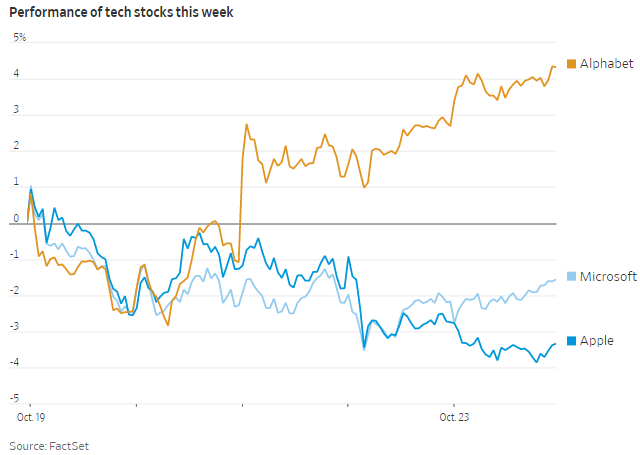

**NETFLIX (NFLX).**

- The king of streaming is fending off fresh rivals to the throne. Netflix on Tuesday said subscriber growth slowed in the third quarter, an underwhelming result after its breakneck pace of growth in the first half of the year as people around the globe turned to streaming services for entertainment during the pandemic-imposed quarantine.**The company reported 2.2 million new subscribers in the quarter, falling short of its forecast in July of 2.5 million and highlighting the sharp decline from the 26 million net subscribers it added in the first two quarters of 2020**. With Walt Disney Co. focusing on streaming initiatives and AT&T Inc. reporting solid growth in its Netflix-like streaming service HBO Max, Netflix is looking for ways to stay on top in an increasingly crowded streaming market. Netflix shares fell 6.9% Wednesday.

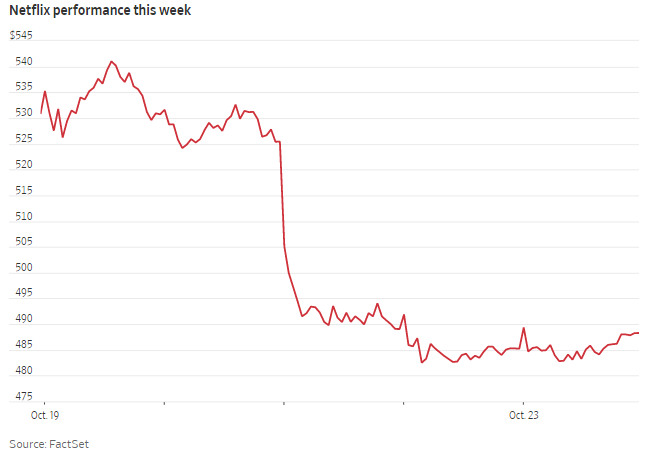

**TESLA INC. (TLSA)**

- Tesla has recharged its batteries after the pandemic disrupted operations earlier in the year. The electric-car maker extended its profitability streak in the third quarter, marking the company’s fifth consecutive quarter in the black. T**esla on Wednesday reported a net profit of USD 331 million for the three-month period ended Sept. 30 and posted a record USD 8.77 billion in revenue. Chief Executive Elon Musk called it Tesla’s “best quarter in history,” and the company revived its pre-pandemic target to build at least 500,000 vehicles this year**. The Silicon Valley car maker was buoyed in part by lower battery and purchasing costs at its production facility in China, as well as growing demand in that country for electric cars. Tesla shares rose 0.7% Thursday.


- **The China State Administration for Market Regulation announced that Tesla is recalling nearly 50,000 of its Model S and Model X electric vehicles**. The recall concerns potentially faulty and unsafe front and rear suspensions. The vehicles were made by Tesla in the U.S. and exported to China. The U.S. vehicle safety authority, NHTSA, has not said whether a similar recall in the U.S. may be necessary.



**SOUTHWEST AIRLINES CO. (LUV).**

- U.S. airlines remain in a holding pattern. Summer was a bust and losses are mounting as airlines anxiously watch a fragile uptick in demand to see if it will hold as coronavirus cases continue to climb. The pandemic eviscerated travel demand during what is typically the most lucrative season, and revenue plunged, with the four largest U.S. carriers reporting losses of more than USD 25 billion this year so far. On Thursday, Southwest said it lost nearly USD 1.2 billion during the third quarter—its biggest quarterly loss ever, and American Airlines Group Inc. reported a loss of USD 2.4 billion. Alaska Air Group Inc. on Thursday reported losing USD 431 million. Southwest shares rose 5.2% Thursday.

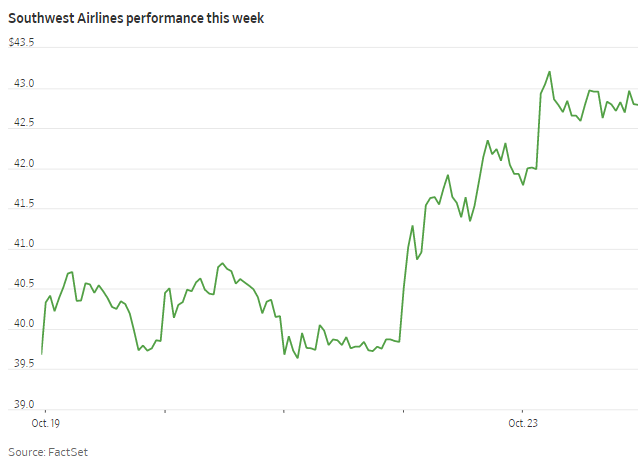

[Back to Table of Contents](#content)

<a id ="fi"></a>
## Fixed Income

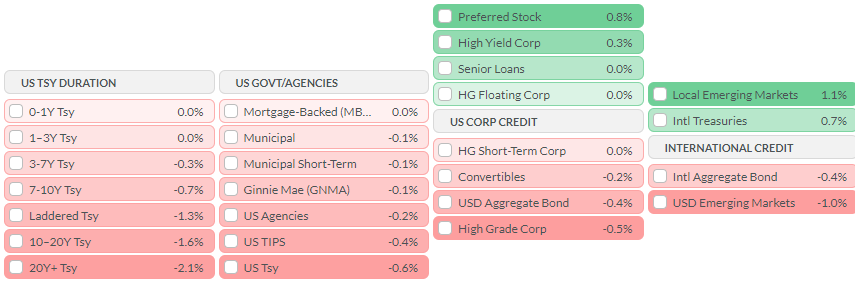

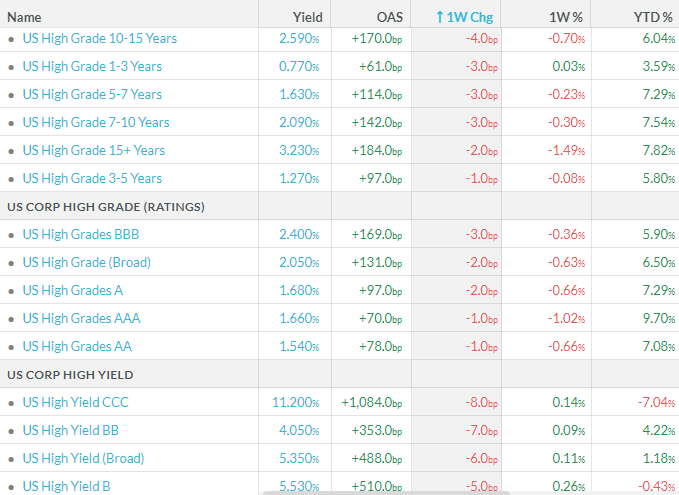

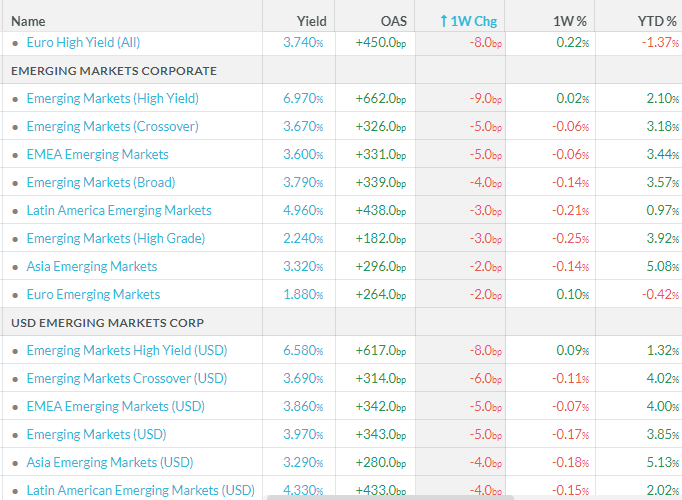

**HIGHLIGHTS**


- The week under review saw US Treasuries under pressure mainly to potentially positive updates by House Speaker Pelosi over the proposed economic stimulus bill to combat the COVID-19 pandemic. Overall benchmark yields rose sharply between 1-17bps across the curve with the longer-ends pressured as the curve bear-steepened. The 2Y benchmark; reflective of interest rate predictions edged 1bps up at 0.15% whilst the much-watched 10Y (which traded within a wider 0.75%-0.86% range); spiked 13bps at 0.86%. Bond yields were seen to reach an almost 4-month high. 


- Meanwhile, the slowing global growth and resurging infections may see more central banks support their respective economies and are expected to boost financial markets with massive asset purchases whilst pushing government borrowing costs to record lows. Expect bond trading activity and volatility in UST levels to be influenced next week by key developments in Washington pertaining to the proposed stimulus bill, as well as first reading of 3Q GDP.


- The swift and substantial monetary policy response to the pandemic shock—which included over 8,000 basis points (bps) of net rate cuts and more than USD 6 trillion of balance sheet expansion from the major economies—is largely behind us. Nevertheless, the bias for central banks remains accommodative and even towards incremental easing. Recent commentary from the Reserve Bank of Australia has firmed up expectations for a rate cut in November and potentially more quantitative easing. Meanwhile, the Reserve Bank of New Zealand is expected to take rates into negative territory in early 2021 and the Bank of England continues to flirt with a similar move, while the European Central Bank looks set to expand its bond purchase programme. 


- In the US, the Federal Reserve (Fed) has made clear its forward rate guidance with the shift to average inflation targeting. Although the future path of the Fed’s quantitative easing programme is less evident, and it’s possible that corporate purchases will not be continued into 2021, markets will likely be reassured by the expectation that the Fed will step back in if needed. Even though most of these potential actions are largely anticipated by investors, the direction of travel for central bank policy continues to be supportive for fixed income assets.


- The rally in core bonds this year has been noteworthy. Ten-year US Treasury yields started the year at 1.92% and currently stand 110 bps lower at 0.82%. German Bunds, with arguably less scope to rally given they were already in negative territory coming into 2020, have still fallen by 40 bps, to -0.59%. More recent moves in the US could look like an inflection point, with 10-year yields rising 14 bps month to date. The drivers of this move higher (potential US fiscal stimulus and vaccine progress) have the potential to push the benchmark US yield up toward 1% as they continue to play out. However, the unwavering support from central banks should limit how much government bond yields can rise, particularly at the front end of curves. (All data as of 21 October.)

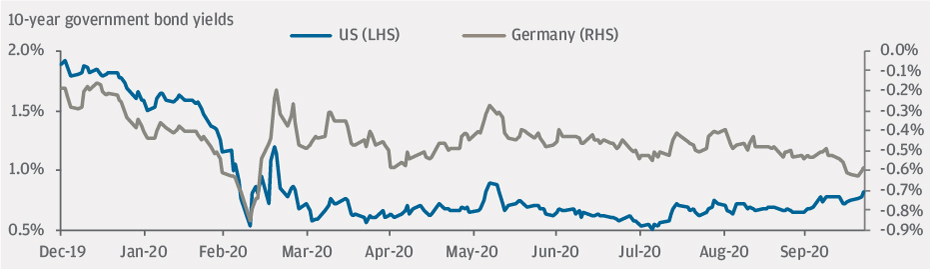


- Bubbling optimism about a re-energized U.S. economic recovery and the inflation that might accompany it sparked a sell-off in long bonds, pushing the 5-year, 30-year yield curve to its steepest level since December 2016. But as benchmark rates breached 0.85% on Thursday, options market activity suggests that bond traders are drawing a line in the sand at 1%.

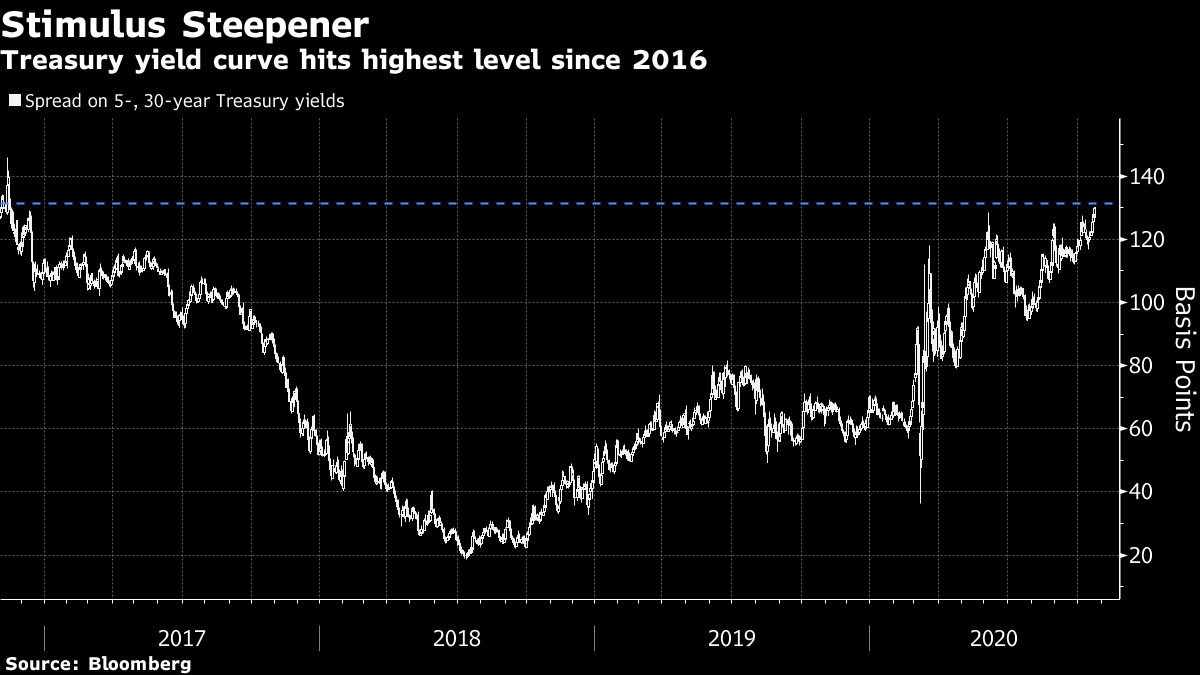

- Despite outflows of USD 55 billion so far this month, money market funds are still up more than USD 750 billion in assets this year, creating a wall of cash looking for a home. With easy central bank policy keeping a cap on yields, the search for income persists. This was particularly evident in the **strong demand for the EU issuance on 20 October—the largest order book in history at EUR 233 billion of orders for just EUR 17 billion of issuance**. Strong performance on the back of the new deal has raised the question of whether the EU could supplant Germany as the eurozone benchmark in time.


- In other markets, **Polish government bond yields have fallen below zero**, joining a small number of elite emerging markets in central and eastern Europe with the luxury of getting paid to borrow. **Mexico’s President Andres Manuel Lopez Obrador** said on Friday that **the central bank needs to cut interest rates further to help reactivate the economy**, even as a spike in inflation is slowing an easing cycle and may end it altogether.

[Back to Table of Contents](#content)

<a id ="cur"></a>
## Currencies (FX)

In [7]:
ccy = pd.read_excel('World_Indices_List.xlsx', sheet_name='Currencies', header=0)
ccy_data = yf.download(list(ccy['Ticker']), start='2020-01-01', progress=False)
ccy_data = ccy_data['Close'].ffill()

In [8]:
def ccy_perf():
    oned_lcl = pd.concat([(ccy_data.iloc[-1,:]/ccy_data.iloc[-6,:]-1),
                            (ccy_data.iloc[-1,:]/ccy_data.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Ticker'
    oned_lcl = ccy.merge(oned_lcl, on='Ticker')
    oned_lcl= oned_lcl.set_index('Ticker')
    return oned_lcl

ccy = ccy_perf()

In [9]:
def ccy_hmap(sortby):   
    hmap = ccy.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Chg WTD (%)': "{:.3%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(ccy.drop(['Name'], axis=1).columns))
    return hmap
    
interact(ccy_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

### Top Currencies Live Cross Rates

In [10]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/forex-cross-rates/" rel="noopener" target="_blank"><span class="blue-text">Forex Rates</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-forex-cross-rates.js" async>
  {
  "width": 770,
  "height": 400,
  "currencies": [
    "EUR",
    "USD",
    "JPY",
    "GBP",
    "CHF",
    "AUD",
    "CAD",
    "NZD",
    "CNY"
  ],
  "isTransparent": false,
  "colorTheme": "light",
  "locale": "en"
}
  </script>
</div>
<!-- TradingView Widget END -->
""")

In [11]:
def perf_ccy(timeframe):
    weekly_usd = ccy
    if timeframe=='Weekly':
        weekly_usd1 = ccy.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'], color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = ccy.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'])

    fig.update_layout(title = 'World Currencies ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Ticker: %{x} <br>Name: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_ccy,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**

> DXY tumbled from 93.70 to 92.5 before recovering to 92.76, while stocks are slightly down week-on-week. USDJPY also broke below 105.00. 10y-UST is the odd one out, as yields rose steadily by 10bps to 0.85% currently, which is the highest level since early June this year. USDCNH continued its 21-week downtrend and broke below 6.6300 briefly, printing a 2-year low, before rebounding to around 6.6750 as of writing. China’s State Administration of Foreign Exchange (SAFE)’s comments this morning that Yuan’s rise is based on fundamentals suggested more room for Yuan strength. 


> BOE hinted a possibility of adopting negative rates in 2021, but was overshadowed by generally positive headlines surrounding the EU-UK trade deal. GBP gained +1.4% against the USD which makes it the biggest gainer of the week within G10 FX, while EUR rose too but not as much, with rising virus cases and previous concerns of EURUSD being above 1.18 curbing its strength. Japan and UK has signed a post-Brexit trade deal, and hopes are high that an EU-UK deal will soon follow. Biden-Trump debate offered little new insights.


- **USD:** : The dollar index ended lower around 92.8 on Friday as investors digest the latest presidential debate and stimulus talks. Joe Biden and Donald Trump had the last debate before the presidential election on Thursday and the Democrat continues to lead the polls. Meanwhile, House Speaker Nancy Pelosi signalled optimism that a stimulus bill can be approved, but she also admitted that it may take a while for legislation to be written and signed. Meanwhile, Treasury Secretary Mnuchin said “We’ve offered compromises, The speaker, on a number of issues, is still dug in. If she wants to compromise, there will be a deal". Yet, a fresh coronavirus aid bill before the election on November 3rd seems unlikely. On the week, the dollar lost 1% loss. The dollar has been weakening since mid-May and is down near 5% on the year amid rising optimism about the global economic recovery, specially a robust rebound in China.



- **EUR**: The Euro traded higher around 1.185 on Friday, not far from the highest since September 16th of 1.188 touched earlier in the week. Investors remained cautious as they wait for news about Brexit negotiations and a US coronavirus aid package. On the economic data front, flash PMI data indicated the first decline in private sector activity in four months, mainly due to a steep deterioration in the service sector due to rising coronavirus worries and restrictions. For the week, the Euro gained 0.92%.


- **GBP**: Sterling ended the week 1% lower at 1.292, amid Brexit uncertainty, Britain's stricter lockdown measures and the possibility of negative interest rates. PM Boris Johnson urged UK businesses to prepare for no deal Brexit, as the EU continued to reject the idea of a free trade deal and as both sides remain divided on key issues such as fishing rights, corporate governance and fair competition. Meanwhile, EU Commission president Ursula von der Leyen announced that negotiations would continue next week, while Johnson's spokesman said that trade talks with the EU were over unless the bloc changed its negotiating position.


- **JPY**: With USD/JPY below 105, Japan’s Ministry of Finance could be concerned over the Yen’s strength. However, with major trading partners in China and Korea allowing their currencies to strengthen (the BoJ’s JPY trade weighted index is still 5% off the highs seen in March), Japanese officials may be a little more tolerant of JPY strength. Also, the non-correlated JPY remains a good way to hedge any narrowing in US opinion polls threatening a contested election result.



- **AUD**: The Aussie dollar has recovered in the past few days, but the idiosyncratic downside risks to the currency remain rather significant. Ten days away from the Reserve Bank of Australia meeting, markets are retaining a very bearish stance which may put a ceiling on further AUD gains next week. Most of the downside risks, however, appear to be somehow related to China. The Sino-Australian relations have neither improved nor deteriorated and the risk of another protectionist move by Beijing may keep the appetite for AUD as somewhat limited. Next week, Chinese leaders will meet to set out their 5-year plan, which is set to be focused on improving self-sufficiency and we will get more details on the plan to shift to carbon-free by 2060. There is quite a lot at stake for Australian exports (coal once again at the centre), and AUD may face some pressure on the back of this.


- **MXN**: The Mexican peso touched a five-week high of 20.876 per USD, as investors turned to riskier currencies amid prospects of further stimulus in the US and as Gilead Sciences’ antiviral drug remdesivir was approved by the US FDA as a treatment for coronavirus. At the same time, latest data showed retail sales in Mexico rose 2.5% over a month earlier in August, marking the fourth consecutive monthly gain as consumer spending continues to recover from the effects of the pandemic. Early this week, jobs figures showed the country’s unemployment rate unexpectedly fell to 5.1% in September from 5.2% in August.


- **ZAR**: ZAR was one of the top gainers this week rising as much as +2.4%. The South African rand hovered around 16.2 against the dollar on Friday, its highest level in over a month, on hopes of a breakthrough in stimulus talks in the US. Locally, investors shift their focus to the delayed medium-term budget speech due on Wednesday which is set to reveal how the economic recovery plan will be financed. The economic reconstruction and recovery plan was unveiled by President Cyril Ramaphosa last week, detailing some of the interventions and new policy directions that the government will take in its effort to revive the economy and create jobs. The government targets an average annual economic growth rate of 3% over the next decade and plans for energy security to be restored in two years.



- **TRY**: Turkey's lira crossed 7.97 per USD for the first time ever, after the country's central bank left interest rates unchanged during its latest policy meeting, defying market expectations of a 175 bps hike; and set the margin between the CBRT Late Liquidity Window lending rate and overnight lending rate as 300 bps. The lira has lost more than 30% since the start of the year, amid geopolitical concerns, depleting foreign exchange reserves, inflationary pressures and a sizable current account deficit. Investors fear that the Azerbaijan-Armenia conflict over the disputed mountain territory called Nagorno-Karabakh could drag Turkey into another regional conflict, while Greece issued a new demand for EU sanctions on Ankara after Turkey said that its ship would carry out a seismic survey in the eastern Mediterranean.

[Back to Table of Contents](#content)

<a id ="comd"></a>
## Commodities

In [12]:
comds= pd.read_excel('World_Indices_List.xlsx', sheet_name='Commodities', header=0)

In [14]:
tdy = str(date.today().day)+'/'+str(date.today().month)+'/'+str(date.today().year)

#def comd_data(commodity):
#    df = investpy.get_commodity_historical_data(commodity=commodity, from_date='01/01/2020', to_date=tdy)['Close']
#    df = pd.DataFrame(df)
#    df.columns = [commodity]
#    return df

#df = pd.DataFrame(index=pd.bdate_range(start='2020-01-01', end=date.today()))
#df.index.name='Date'

#for i in range(len(comds)):
#    df = df.join(comd_data(comds['Commodities'][i]), on='Date')

#df = df.ffill().dropna()
#df.to_excel('comd1.xlsx')

In [15]:
df = pd.read_excel('rawdata.xlsx', sheet_name='Commodities', header=0, index_col=0)

In [16]:
def comd_perf():
    oned_lcl = pd.concat([df.iloc[-1,:], (df.iloc[-1,:]/df.iloc[-6,:]-1),
                            (df.iloc[-1,:]/df.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Price (EOD)', 'Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Commodities'
    return oned_lcl

comd = comd_perf()
comd.drop('Lumber', axis=0, inplace=True)

In [17]:
def comd_hmap(sortby):   
    hmap = comd.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}", 'Chg WTD (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)'], axis=1).columns))
    return hmap
    
interact(comd_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [18]:
def perf_comd(timeframe):
    weekly_usd = comd
    if timeframe=='Weekly':
        weekly_usd1 = comd.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).dropna().sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values,text=weekly_usd1.index, color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = comd.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1.index, color_continuous_scale='rdylgn')

    fig.update_layout(title = 'Commodities ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Return (%)',
                       yaxis_title='Commodities', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Commodity: %{x} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_comd,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS**

> Commodity prices have generally seen a strong October so far with the Bloomberg Commodity Index trading higher by 4%, thereby outperforming stocks with the S&P 500 up by around 1%. The two main sectors driving these gains has been grains, on a combination of weather concerns and strong demand and industrial metals, such as copper which reached a two-year high as the Chinese yuan surged higher and supply disruptions occurred in Chile.


> From a macroeconomic perspective, it has been a month where the countdown to the U.S. presidential election on November 3 has increasingly been pointing toward a win for Joe Biden. In response to this, the market has adopted a more reflationary approach with long-end bond yields rising while the dollar has softened. Both of these developments providing some additional tailwind to commodities in general, despite a renewed surge in coronavirus cases threatening the fragile economic recovery and with that the short-term demand outlook.


-  **WTI Crude** futures dropped 2.2% to near 39.8 a barrel on Friday, booking a 2.7% drop on the week, the first weekly decline in three. Concerns over fuel demand recovery mounted as the number of global coronavirus infections continue to rise with several countries including the UK, Spain, Italy and the US state of Utah imposing fresh restrictions. On the production side, Libyan oil output is expected to rise further by the end of the month, also pressuring crude prices. On the other hand, prospects of an extension to OPEC-led supply curbs and coronavirus vaccine news prevented further declines.


- The OPEC+ group will meet on December 1 and decide whether to implement or postpone the previously agreed 1.9 million barrels/day production increase from January. With a vaccine still months away from being rolled out globally, the current slow recovery in fuel demand together with rising production from Libya has left the group with a tough decision to make. The U.S. election result, OPEC+ meeting and Covid-19’s impact on demand are likely to be the main factors determining where Brent crude oil will finish the year within the USD 38/b to USD 48/b range. For now, both Brent and WTI crude oil remain stuck in ranges in the low 40’s with limited possibility of a breakout before November 3.



- Under the document’s worst-case scenario, Libyan production would rise in 2021 to as much as 1.1 million bpd, a source familiar with the details of the meeting said. Under its base case, Libyan output would be 600,000 bpd in 2021. Under the worst-case scenario, OECD commercial oil inventories - a benchmark OPEC+ uses to gauge the market - would remain high in 2021 compared to the five-year average rather than starting to fall below that mark. This scenario also sees a stronger and more prolonged second wave of COVID-19 in the fourth quarter of 2020 and first quarter of 2021 in Europe, the United States and India leading to a lower economic recovery, weakening oil demand.


- **Copper**: Following a short-lived correction in early October, HG copper resumed its ascent to reach the highest level in more than two years at USD 3.22/lb. It was a sharp drop in stocks held at exchange-monitored warehouses that drove the September rally. The latest leg higher, meanwhile, has occurred at a time when stock levels have started to recover. Instead, the latest extension was driven by a rally in the Chinese Yuan to the highest level against the dollar since July 2018, the risk of strike-related supply disruptions in Chile and not least the latest stimulus talks in Washington.



- **Gold** has settled into wait-and-see mode while trading close to USD 1900/oz. It’s current struggle to find fresh momentum saw funds in the week to October 13 reduce their futures and options net-long to 12 million ounces, the lowest since June 2019 which was just before gold began its 50% rally to the current level.


- The **Bloomberg Grains Index reached a 15-month high this week** and has now rallied more than 25% from the August low. While the wheat market paused following its recent surge, the rally in corn and soybeans extended further on concerns about global production at a time of strong demand. Dryness blamed on La Nina is fueling South American production concerns at a time when China has undertaken a massive restocking program.


- Potential South American and Black Sea rainfalls hold the short-term key with a very extended hedge fund long posing a correction risk. In the week to October 13, the combined net-long across six soy, corn and wheat contracts reached 627,000 lots, the highest since April 2014.

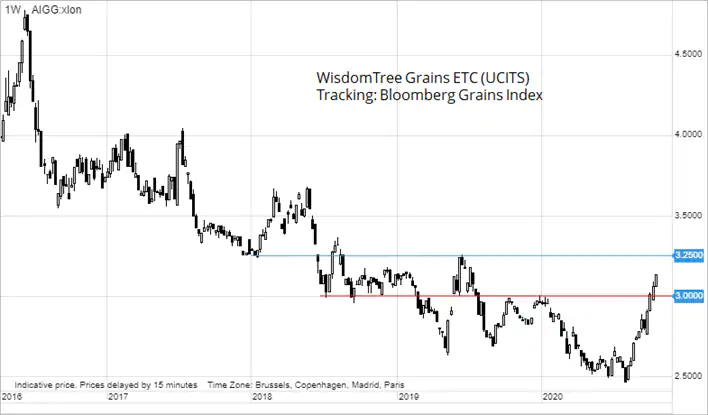

[Back to Table of Contents](#content)

<a id ="charts"></a>
### CHARTS OF THE WEEK

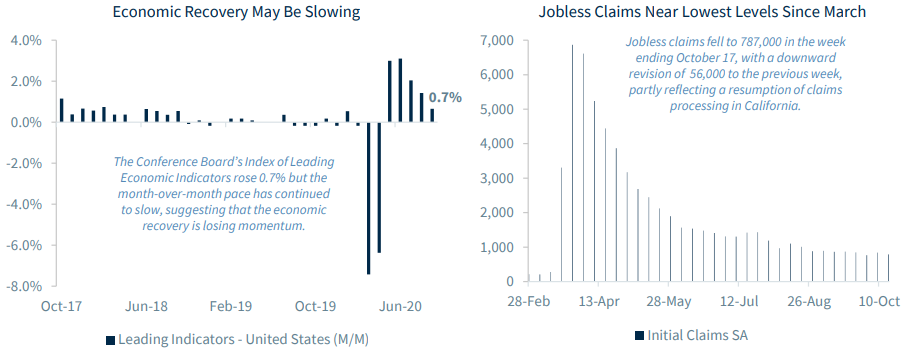

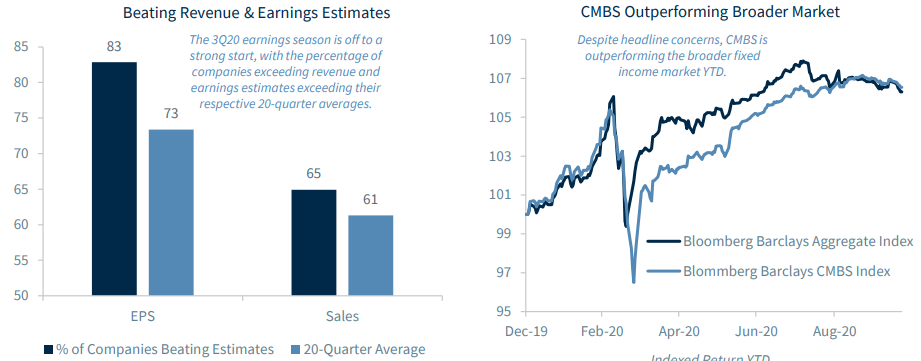

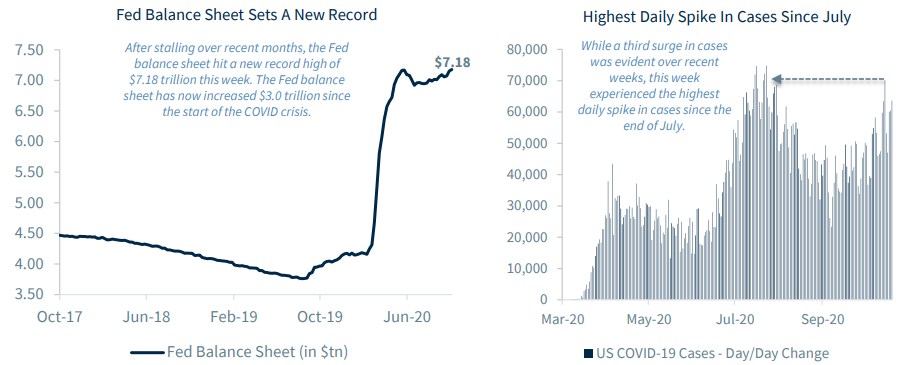

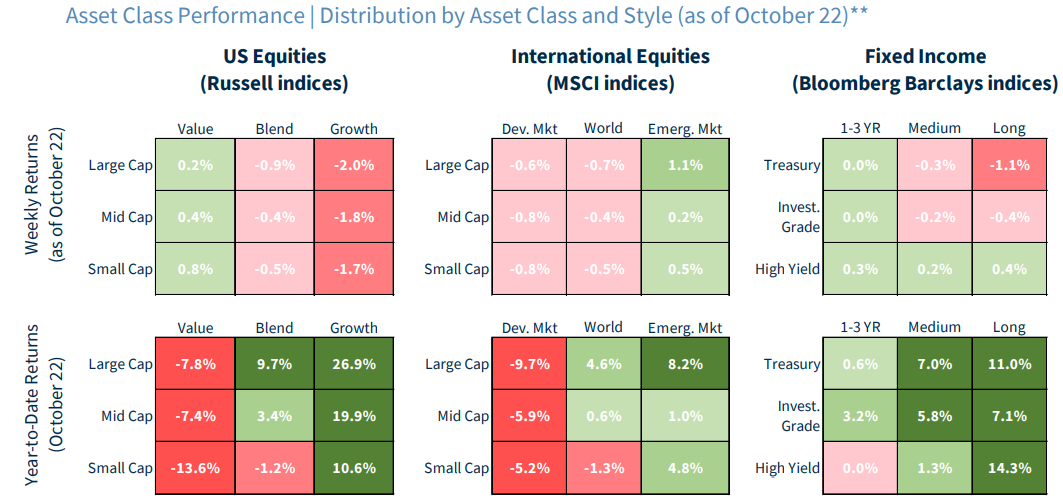

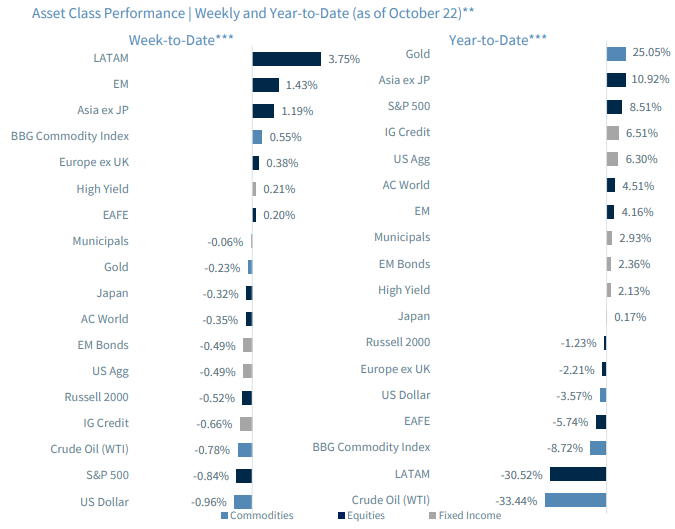

[Back to Table of Contents](#content)

<a id ="eco"></a>

## Key Economic Events Next Week 

In [30]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/economic-calendar/" rel="noopener" target="_blank"><span class="blue-text">Economic Calendar</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-events.js" async>
  {
  "colorTheme": "light",
  "isTransparent": false,
  "width": "700",
  "height": "600",
  "locale": "en",
  "importanceFilter": "0,1"
}
  </script>
</div>
<!-- TradingView Widget END --> """)

[Back to Table of Contents](#content)